# Lyric Preprocessing

In [13]:
import pandas as pd

df = pd.read_csv('../billboard_lyrics_1960-2024.csv')

print(df.isnull().sum())

df = df.dropna(subset=['lyrics'])

df.head()

year       0
rank       0
title      0
artist     0
url        3
lyrics    94
dtype: int64


,year,rank,title,artist,url,lyrics
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,There's a summer place\nWhere it may rain or s...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,[Verse 1]\nPut your sweet lips a little closer...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,[Chorus]\nDon't want your love anymore\nDon't ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o..."


In [14]:
df['lyrics'] = df['lyrics'].str.lower()

df.head()

,year,rank,title,artist,url,lyrics
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,there's a summer place\nwhere it may rain or s...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,[verse 1]\nput your sweet lips a little closer...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,[chorus]\ndon't want your love anymore\ndon't ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,[intro]\n*vocalizations*\n[verse 1]\non the ba...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,"[intro]\nteen angel\nteen angel\nteen angel, o..."


In [15]:
import re

def remove_special_chars(text):
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['lyrics'] = df['lyrics'].apply(remove_special_chars)

df.head()

,year,rank,title,artist,url,lyrics
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...


In [16]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
df['lyrics_tokens'] = df['lyrics'].apply(word_tokenize)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"[theres, a, summer, place, where, it, may, rai..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"[put, your, sweet, lips, a, little, closer, to..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"[dont, want, your, love, anymore, dont, want, ..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"[vocalizations, on, the, bank, of, the, river,..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[teen, angel, teen, angel, teen, angel, ooh, t..."


In [17]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['lyrics_tokens'] = df['lyrics_tokens'].apply(lambda x: [item for item in x if item not in stop_words])

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"[theres, summer, place, may, rain, storm, yet,..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"[put, sweet, lips, little, closer, phone, lets..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"[dont, want, love, anymore, dont, want, kisses..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"[vocalizations, bank, river, stood, running, b..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[teen, angel, teen, angel, teen, angel, ooh, f..."


In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['lyrics_tokens'] = df['lyrics_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"[there, summer, place, may, rain, storm, yet, ..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"[put, sweet, lip, little, closer, phone, let, ..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"[dont, want, love, anymore, dont, want, kiss, ..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"[vocalization, bank, river, stood, running, be..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[teen, angel, teen, angel, teen, angel, ooh, f..."


In [20]:
from collections import Counter
df['lyrics_cleaned'] = df['lyrics_tokens'].apply(lambda x: ' '.join(x))
common_phrases = Counter(" ".join(df['lyrics_cleaned']).split()).most_common(20)
print(common_phrases)

[('love', 10196), ('im', 9071), ('dont', 7832), ('know', 7683), ('like', 6989), ('got', 5639), ('baby', 5455), ('oh', 5365), ('yeah', 5345), ('na', 5291), ('go', 5075), ('say', 4981), ('get', 4834), ('one', 4482), ('time', 4442), ('youre', 4254), ('come', 3824), ('let', 3797), ('want', 3726), ('make', 3542)]


In [21]:
all_words = [word for tokens in df['lyrics_tokens'] for word in tokens]
word_freq = Counter(all_words)

print(word_freq.most_common(10))
print(word_freq.most_common()[:-10-1:-1])

[('love', 10196), ('im', 9071), ('dont', 7832), ('know', 7683), ('like', 6989), ('got', 5639), ('baby', 5455), ('oh', 5365), ('yeah', 5345), ('na', 5291)]
[('petulance', 1), ('thеyve', 1), ('pbr', 1), ('mеan', 1), ('authentic', 1), ('projection', 1), ('unpolite', 1), ('ninefifty', 1), ('fraternal', 1), ('twinnin', 1)]


In [23]:
# save
df.to_csv('../data/billboard_lyrics_1960-2024_cleaned.csv', index=False)

In [24]:
df.head()

,year,rank,title,artist,url,lyrics,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"[there, summer, place, may, rain, storm, yet, ...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"[put, sweet, lip, little, closer, phone, let, ...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"[dont, want, love, anymore, dont, want, kiss, ...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"[vocalization, bank, river, stood, running, be...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[teen, angel, teen, angel, teen, angel, ooh, f...",teen angel teen angel teen angel ooh fateful n...


# Difficulties

In [2]:
import pandas as pd

df2 = pd.read_csv('../data/billboard_lyrics_1960-2024_cleaned.csv')
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...


In [3]:
from textstat import flesch_kincaid_grade
from difficulty import lexical_density, average_sentence_length, type_token_ratio, word_difficulty

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [4]:
def average_word_difficulty(words):
    return sum([word_difficulty(word) for word in words]) / len(words)

In [5]:
df2['readability'] = df2['lyrics'].apply(flesch_kincaid_grade)
df2['lexical_density'] = df2['lyrics'].apply(lexical_density)
df2['sentence_complexity'] = df2['lyrics'].apply(average_sentence_length)
df2['lexical_diversity'] = df2['lyrics_cleaned'].apply(type_token_ratio)

In [6]:
df2['word_difficulty'] = df2['lyrics_tokens'].apply(average_word_difficulty)
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_tokens,lyrics_cleaned,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...,38.0,0.461538,104.0,0.659574,2.842233
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...,56.7,0.572368,152.0,0.589041,2.646774
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...,53.6,0.689655,145.0,0.455556,2.873184
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...,46.9,0.661157,121.0,0.583333,2.936652
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...,40.3,0.588785,107.0,0.627451,2.991189


In [7]:
# standardize readability, lexical_density, sentence_complexity, lexical_diversity, word_difficulty
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']] = scaler.fit_transform(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']])
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_tokens,lyrics_cleaned,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...,-0.062536,-1.916639,-0.061049,0.163772,0.246530
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...,-0.037399,-0.580656,-0.035887,-0.307639,-0.654222
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...,-0.041566,0.833160,-0.039556,-1.199792,0.389162
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...,-0.050572,0.489633,-0.052137,-0.345787,0.681648
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...,-0.059444,-0.382764,-0.059476,-0.050926,0.932980


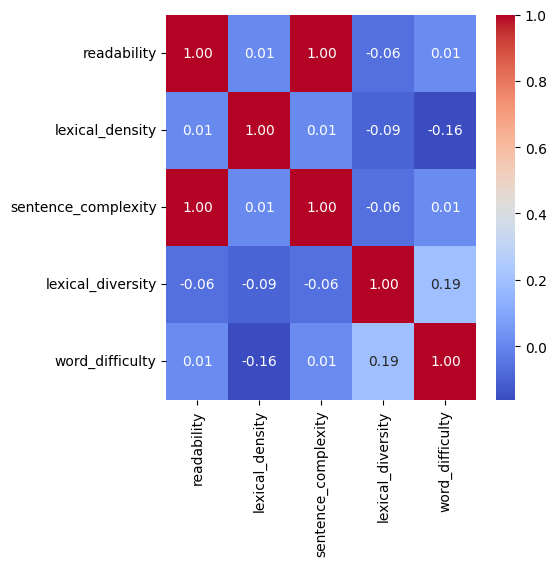

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
# values range from -1 to 1
sns.heatmap(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [9]:
# lyrics difficulty = readability + lexical_density + lexical_diversity + word_difficulty
df2['lyrics_difficulty'] = df2['readability'] + df2['lexical_density'] + df2['lexical_diversity'] + df2['word_difficulty']

# standardize
df2['lyrics_difficulty'] = (df2['lyrics_difficulty'] - df2['lyrics_difficulty'].mean()) / df2['lyrics_difficulty'].std()

<Figure size 1000x1000 with 0 Axes>

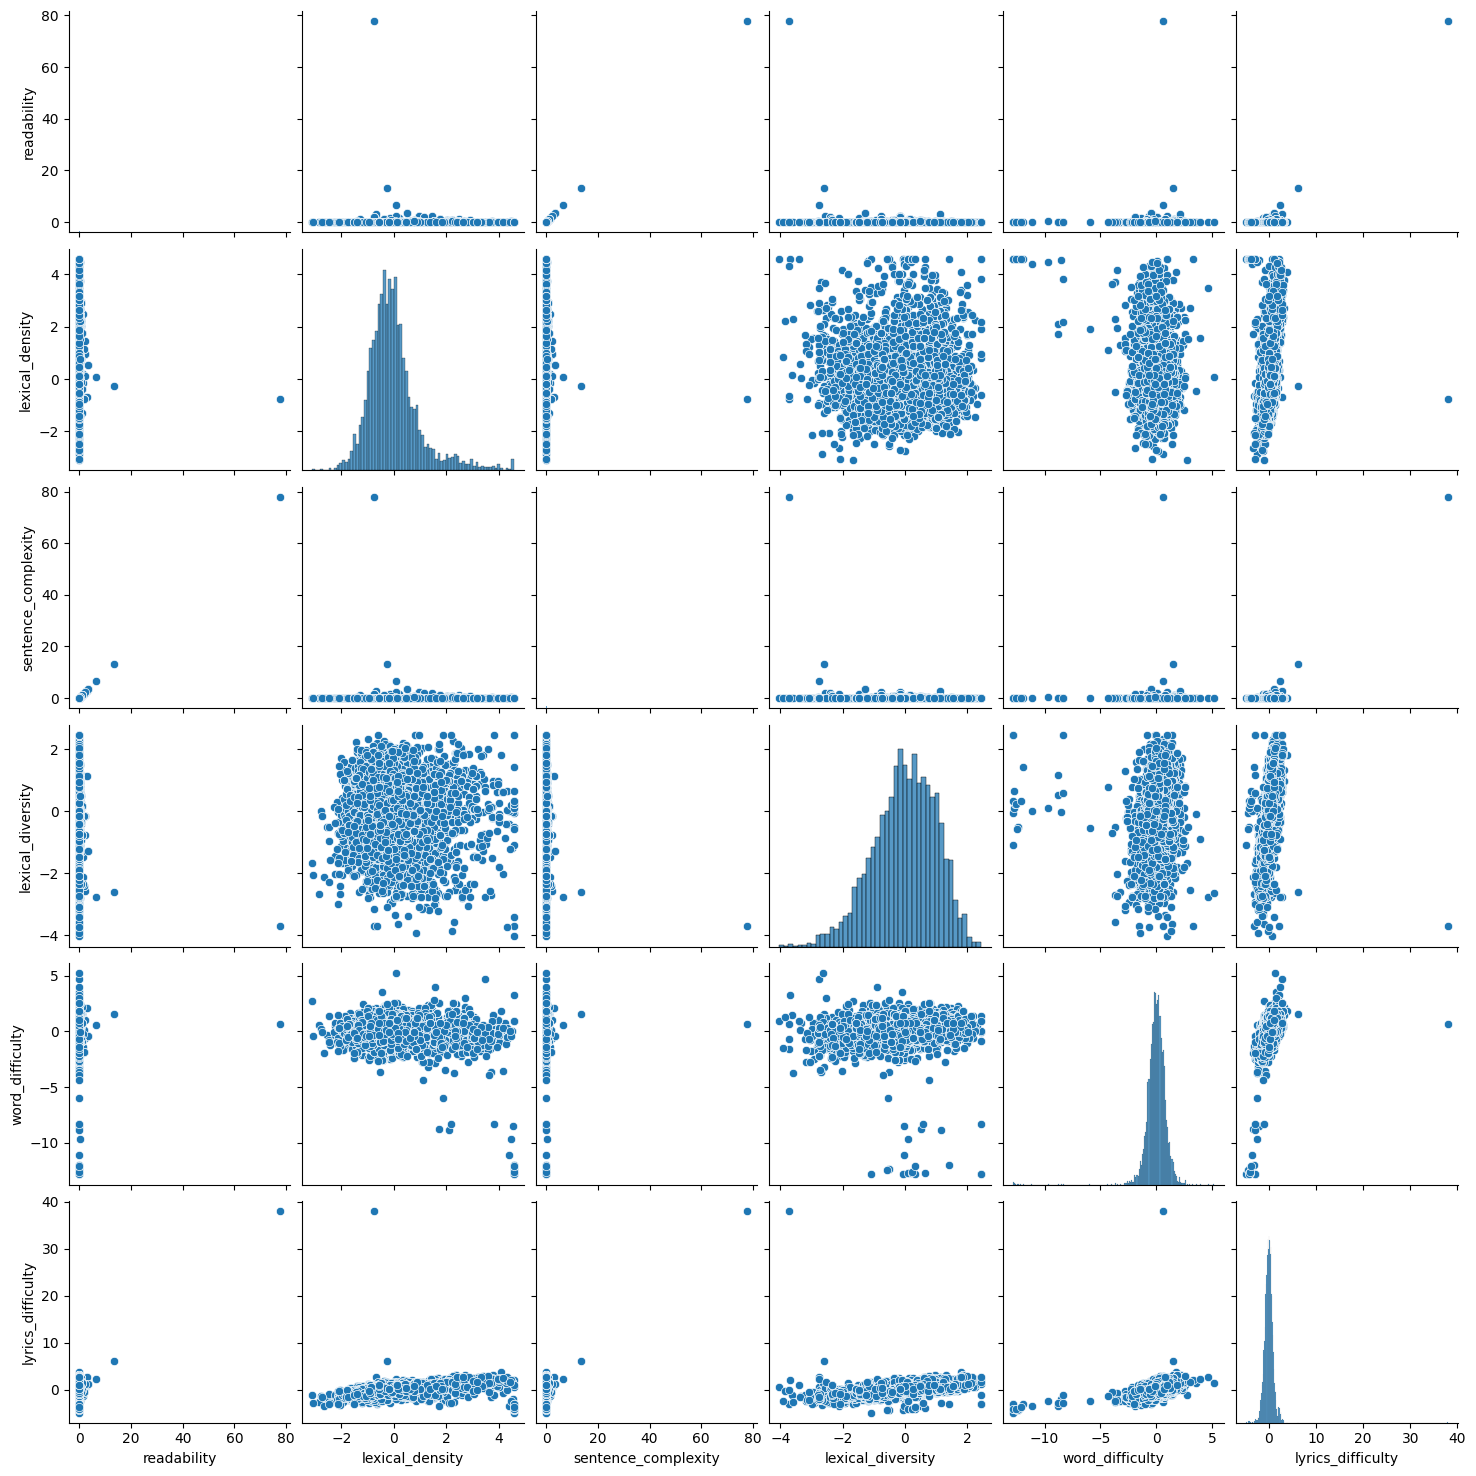

In [10]:
# crossplot of readability, lexical density, sentence complexity, lexical diversity, word difficulty, and lyrics difficulty
plt.figure(figsize=(10, 10))
sns.pairplot(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty', 'lyrics_difficulty']])
plt.show()

In [11]:
df2['lyrics_difficulty'].describe()

count    6.407000e+03
mean    -3.548832e-17
std      1.000000e+00
min     -4.808674e+00
25%     -5.294205e-01
50%     -6.584917e-04
75%      4.973478e-01
max      3.795286e+01
Name: lyrics_difficulty, dtype: float64

In [12]:
quantile_33 = df2['lyrics_difficulty'].quantile(0.33)
quantile_67 = df2['lyrics_difficulty'].quantile(0.67)

def classify_lyrics_difficulty(difficulty):
    if difficulty < quantile_33:
        return 'easy'
    elif difficulty <= quantile_67:
        return 'medium'
    else:
        return 'hard'

df2['lyrics_difficulty_class'] = df2['lyrics_difficulty'].apply(classify_lyrics_difficulty)

df2['lyrics_difficulty_class'].value_counts()

lyrics_difficulty_class
medium    2179
easy      2114
hard      2114
Name: count, dtype: int64

In [13]:
# save df2
df2.to_csv('../data/billboard_lyrics_1960-2024_difficulty.csv', index=False)